_<h1 style="text-align: center;">Chapter I: S&P 500 Market Trend Analysis</h1>_

<br>

The objective of this analysis is to see the overall trend of the S&P $500$ in the last 40 years. We will use this as a barometer to compare the performance of the Tech sector to in later analyses, but first, let's get a good idea of how the market more generally was performing in the tumultuous last 40 years. The key questions we will answer for this chapter of the analysis are:
1. How has the S&P $500$ trended in the last $40$ years?
2. What were the yearly returns of the S&P $500$ over the past $40$ years?
3. How did major technological breakthroughs affect the S&P $500$?

<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import yfinance as yf
import matplotlib.dates as mdates

# import last 40 years of S&P 500 data
sp500 = yf.Ticker('^GSPC')
df_sp500 = sp500.history(start='1984-01-02')

# Display Dataframe
df_sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1984-01-03 00:00:00-05:00,164.929993,164.929993,163.979996,164.039993,71340000,0.0,0.0
1984-01-04 00:00:00-05:00,164.089996,166.779999,164.039993,166.779999,112980000,0.0,0.0
1984-01-05 00:00:00-05:00,166.779999,169.100006,166.779999,168.809998,159990000,0.0,0.0
1984-01-06 00:00:00-05:00,168.809998,169.309998,168.490005,169.279999,137590000,0.0,0.0
1984-01-09 00:00:00-05:00,169.179993,169.460007,168.479996,168.899994,107100000,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,0.0,0.0
2025-08-01 00:00:00-04:00,6287.279785,6287.279785,6212.689941,6238.009766,5827150000,0.0,0.0
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,0.0,0.0


<br>

_<h3 style="text-align: center;">Section 1.1: Trend of the S&P $500$ over the past $40$ years</h3>_

<br>

                                 Open        High         Low       Close  \
Date                                                                        
1984-01-03 00:00:00-05:00  164.929993  164.929993  163.979996  164.039993   
1984-01-04 00:00:00-05:00  164.089996  166.779999  164.039993  166.779999   
1984-01-05 00:00:00-05:00  166.779999  169.100006  166.779999  168.809998   
1984-01-06 00:00:00-05:00  168.809998  169.309998  168.490005  169.279999   
1984-01-09 00:00:00-05:00  169.179993  169.460007  168.479996  168.899994   

                              Volume  Dividends  Stock Splits  
Date                                                           
1984-01-03 00:00:00-05:00   71340000        0.0           0.0  
1984-01-04 00:00:00-05:00  112980000        0.0           0.0  
1984-01-05 00:00:00-05:00  159990000        0.0           0.0  
1984-01-06 00:00:00-05:00  137590000        0.0           0.0  
1984-01-09 00:00:00-05:00  107100000        0.0           0.0  
<class 'pand

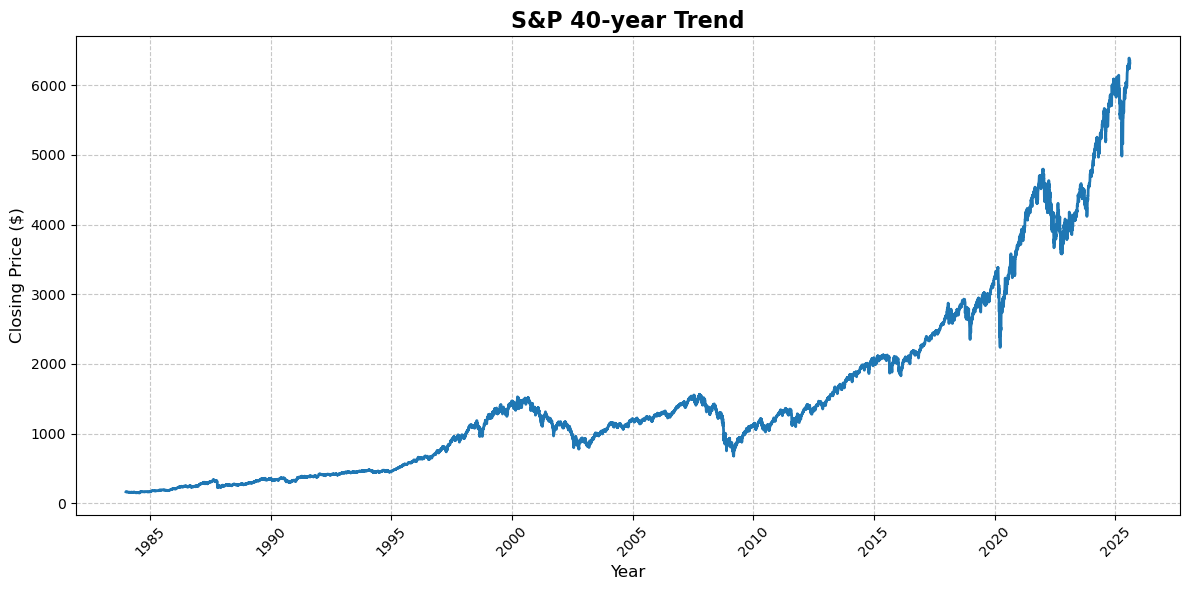

In [2]:
print(df_sp500.head())
print(df_sp500.info())
print(df_sp500.columns)
print(df_sp500.describe())

print(df_sp500['Dividends'].nunique()) # 1 unique value, so all zeroes
print(df_sp500['Stock Splits'].nunique()) # 1 unique value as well, all zeroes

df_sp500 = df_sp500.drop(columns= ['Dividends', 'Stock Splits']) # Drop Dividends and Stock Splits as they don't contribute any meaningful information
print(df_sp500.head())

# Plot the trend of the S&P 500 over the past 40 years

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df_sp500, x=df_sp500.index, y='Close', ax=ax, linewidth=2)
ax.set_title('S&P 40-year Trend', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylabel('Closing Price ($)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see above, the overall trend for the S&P $500$ in the past $40$ years has been positive. Of course, the increase is not strictly monotonic, and we will contextualize many of these more unique features in the upcoming sections. Let's now investigate, what kind of returns one could expect to get on a yearly basis if investing in this index fund.

<br>

_<h3 style="text-align: center;">Section 1.2: Yearly Returns for S&P $500$</h3>_

<br>

In [4]:
# Calculate the yearly returns
df_sp500['Year'] = df_sp500.index.year
df_sp500['Yearly Return'] = df_sp500['Close'].pct_change(252)*100 # 252 trading days per year
print(df_sp500)

# Group by year to get yearly returns
yearly_returns = df_sp500.groupby('Year')['Yearly Return'].last()
print(yearly_returns)

                                  Open         High          Low        Close  \
Date                                                                            
1984-01-03 00:00:00-05:00   164.929993   164.929993   163.979996   164.039993   
1984-01-04 00:00:00-05:00   164.089996   166.779999   164.039993   166.779999   
1984-01-05 00:00:00-05:00   166.779999   169.100006   166.779999   168.809998   
1984-01-06 00:00:00-05:00   168.809998   169.309998   168.490005   169.279999   
1984-01-09 00:00:00-05:00   169.179993   169.460007   168.479996   168.899994   
...                                ...          ...          ...          ...   
2025-07-31 00:00:00-04:00  6427.020020  6427.020020  6327.640137  6339.390137   
2025-08-01 00:00:00-04:00  6287.279785  6287.279785  6212.689941  6238.009766   
2025-08-04 00:00:00-04:00  6271.709961  6330.689941  6271.709961  6329.939941   
2025-08-05 00:00:00-04:00  6336.629883  6346.000000  6289.370117  6299.189941   
2025-08-06 00:00:00-04:00  6

Lets visualize this a little easier and create a dataframe for the returns and calculate the cumulative returns to more easily understand the kinds of gains one would expect to recieve. Then we'll plot the returns for each year as well as the cumulative returns with annotations for important events that may have had an impact on the performance of the index fund.

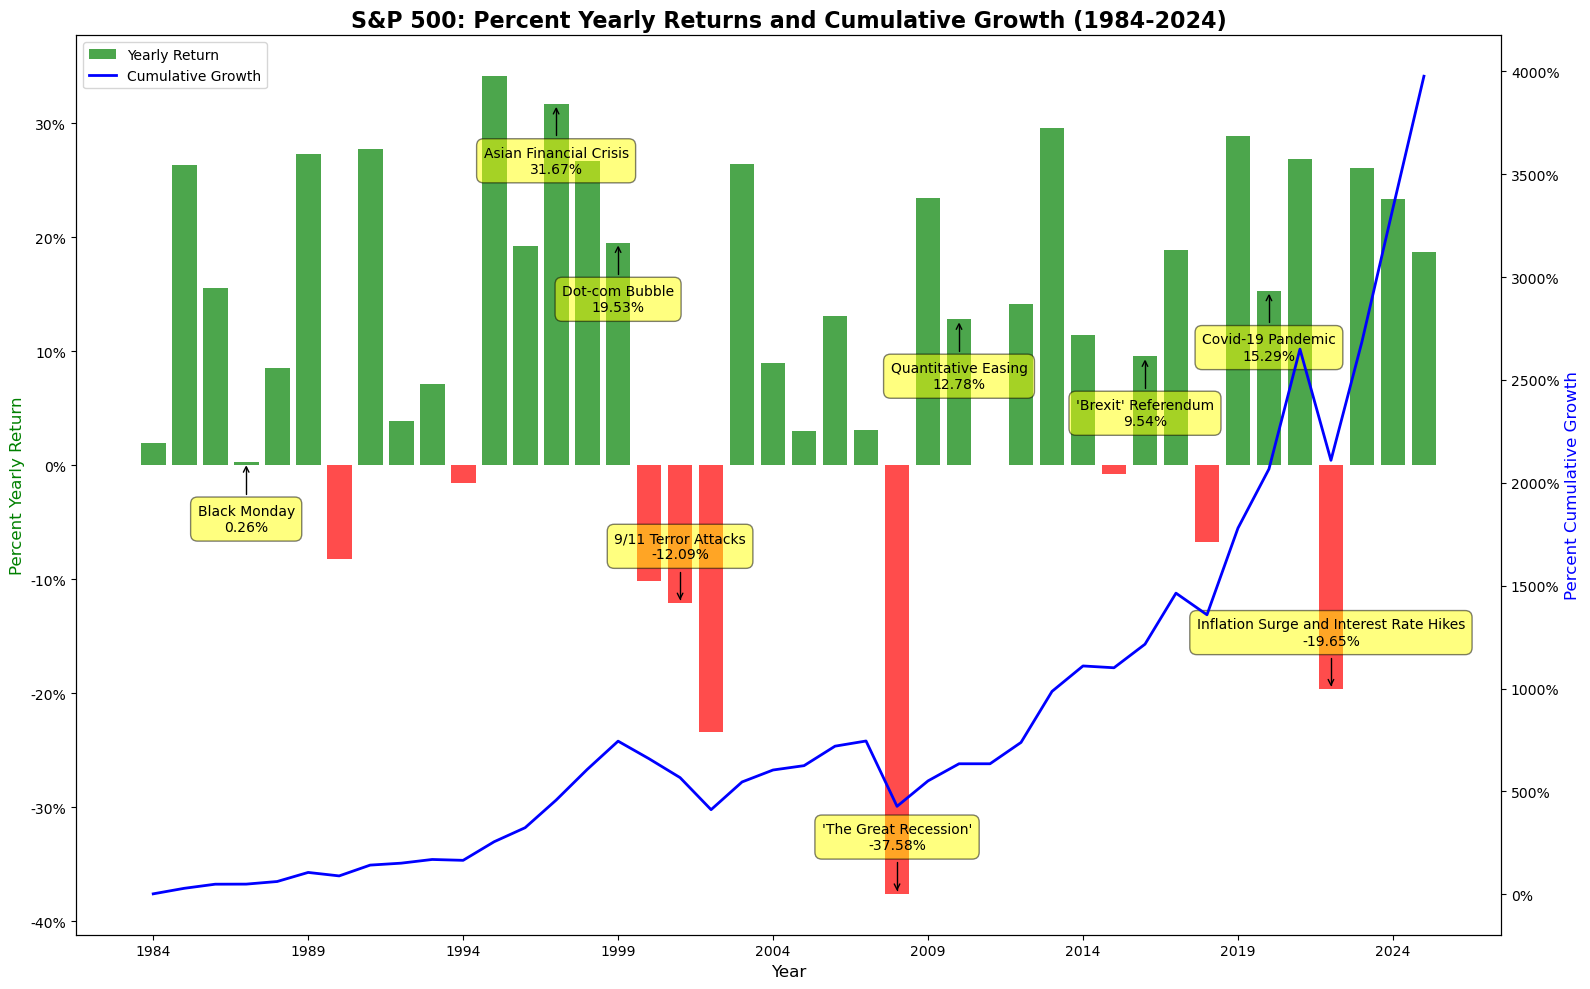

Average Annual Return: 10.55%
Best Year: 1995 34.11%
Worst Year: 2008 -37.58%
Positive Years: 32 (76.2%)
Negative Years: 10 (23.8%)
Cumulative Growth: 3976.68%


In [5]:
# Create a dataframe for returns
df_returns = yearly_returns.reset_index()
df_returns.columns = ['Year', 'Return']

# Cumulative Returns calculation
df_returns['Cumulative Returns'] = (1 + df_returns['Return'] / 100).cumprod()-1

# Plot yearly returns
fig, ax1 = plt.subplots(figsize=(16,10))
bars = ax1.bar(df_returns['Year'], df_returns['Return'], alpha=0.7, color=np.where(df_returns['Return'] >= 0, 'green', 'red'))

# Primary Y-axis for returns
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Percent Yearly Return', fontsize=12, color='g')

# Secondary Y-axis for cumulative growth
ax2 = ax1.twinx()
ax2.plot(df_returns['Year'], df_returns['Cumulative Returns']*100, color='blue', linewidth=2)
ax2.set_ylabel('Percent Cumulative Growth', fontsize=12, color='b')
plt.title('S&P 500: Percent Yearly Returns and Cumulative Growth (1984-2024)', fontsize=16, fontweight='bold')

# Show every 5th year for the sake of readibility and concision
plt.xticks(df_returns['Year'][::5])

# Customize y-axis formats
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Define dictionary of events which may have contributed to S&P 500 stock index price changes
events = [(1987, "Black Monday"), 
          (1997, "Asian Financial Crisis"), 
          (1999, "Dot-com Bubble"), 
          (2001, "9/11 Terror Attacks"), 
          (2008, "'The Great Recession'"), 
          (2010, "Quantitative Easing"), 
          (2016, "'Brexit' Referendum"), 
          (2020, 'Covid-19 Pandemic'), 
          (2022, "Inflation Surge and Interest Rate Hikes")]

# Add annotations for all major events
for year, event in events:
    if year in df_returns['Year'].values:
        return_value = df_returns.loc[df_returns['Year'] == year, 'Return'].values[0]
        ax1.annotate(f"{event}\n{return_value:.2f}%", 
                     (year, return_value),
                     xytext=(0, 30 if return_value < 0 else -30),
                     textcoords="offset points",
                     ha='center',
                     va='bottom' if return_value < 0 else 'top',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc,rad=0'))
        
# Add legend
ax1.legend([bars, ax2.get_lines()[0]], ['Yearly Return', 'Cumulative Growth'], loc='upper left')

plt.tight_layout()
plt.show()

# Summarizing Statistics
max_year = df_returns.loc[df_returns['Return'].idxmax(), 'Year']
min_year = df_returns.loc[df_returns['Return'].idxmin(), 'Year']
print(f"Average Annual Return: {df_returns['Return'].mean():.2f}%")
print(f"Best Year: {max_year} {df_returns['Return'].max():.2f}%")
print(f"Worst Year: {min_year} {df_returns['Return'].min():.2f}%")
print(f"Positive Years: {(df_returns['Return'] > 0).sum()} ({(df_returns['Return'] > 0).mean()*100:.1f}%)")
print(f"Negative Years: {(df_returns['Return'] < 0).sum()} ({(df_returns['Return'] < 0).mean()*100:.1f}%)")    
print(f"Cumulative Growth: {df_returns['Cumulative Returns'].iloc[-1]*100:.2f}%")

We note a few interesting things:
1. Average annual returns at $10.55$% are quite good. To contextualize:
    1. This is around $3-5x$ the historic inflation rate ($2-3$%)
    2. Meaningfully better than bonds during the same period ($10$-year Treasuries historically returned ~$5-6$% during this period)
    3. Rule of $72$ - At $10.55$%, your investment would double approximately every $6.8$ years, which is a strong compounding effect
2. The worst year, to no ones surprise, was 2008, or the beginning of the 'Great Recession'. The subprime mortgage crisis led to systemic failures
    1. Many institutions failed or required bailouts (e.g., AIG, Lehman Brothers)
    2. Liquidity evaporated and interbank lending nearly stopped leading to a credit freeze
    3. The uncertainty in the market led to panic selling where institutional and retail investors rapidly exited equities
    4. The crisis was a global contagion; markets around the world plunged, reinforcing the fear and volatility exhibited in the US market
    5. Fear and uncertainty dominated the market psychology; the volatility index (VIX) hit record highs. Investors lost confidence, not just in companies, but in the entire financial system.
3. The best year was $1995$. There are a few reasons for this:
    1. The U.S. Economy was recovering at a rapid pace post early $90$'s recession
    2. This time is often considered thebeginning of the 'tech boom'. The dot-com era begins to gain traction, leading to increasing valuations and investor optimism
    3. Alan Greenspan, the Fed Chair at the time, just concluded a tightening cycle, keeping the fed rates stable in $1995$, allowing equities to rally
    4. Brod corporate profitibility and low interest rates (~$2.5$%) harmonized to create favorable market conditions
    5. As opposed to $2008$ the market psychology was transitioning from one dominated by caution to one dominated by confidence. However, this would not last forever and market ascendancy culminated in the dot-com bubble ($2000$) and the $9/11$ terror attacks ($2001$)
4. To contextualize the cumulative growth of $3976.68$% lets assume a young ($25$ professional in $1984$ makes a modest one-time lump sum investment of $10,000$. That $10,000$ would balloon to $400,000$ by the time they hit retirement age in $2025$. Accounting for inflation, this is around $125,000$ in $1984$ so the investment in real dollars increased by a factor of $12.5$ completely passively.
5. In summary: The S&P $500$ is the long term equity benchmark for a reason; the excellent long term average of $10.55$% smooths over extreme volatility and highlights the power of diversification and staying invested.

<br>

_<h3 style="text-align: center;">Section 1.3: Technological impacts on the S&P $500$</h3>_

<br>

There is no doubt that technological advancements can have a disrupting affect on markets. Especially, in the last $40$ years where we have seen not one but multiple paradigm shifting technological advancements in things such as smartphones, the internet, social media, artificial intelligence and large language models. Lets explore the impacts of these technological advancements on the S&P $500$ and, by extension, the market!

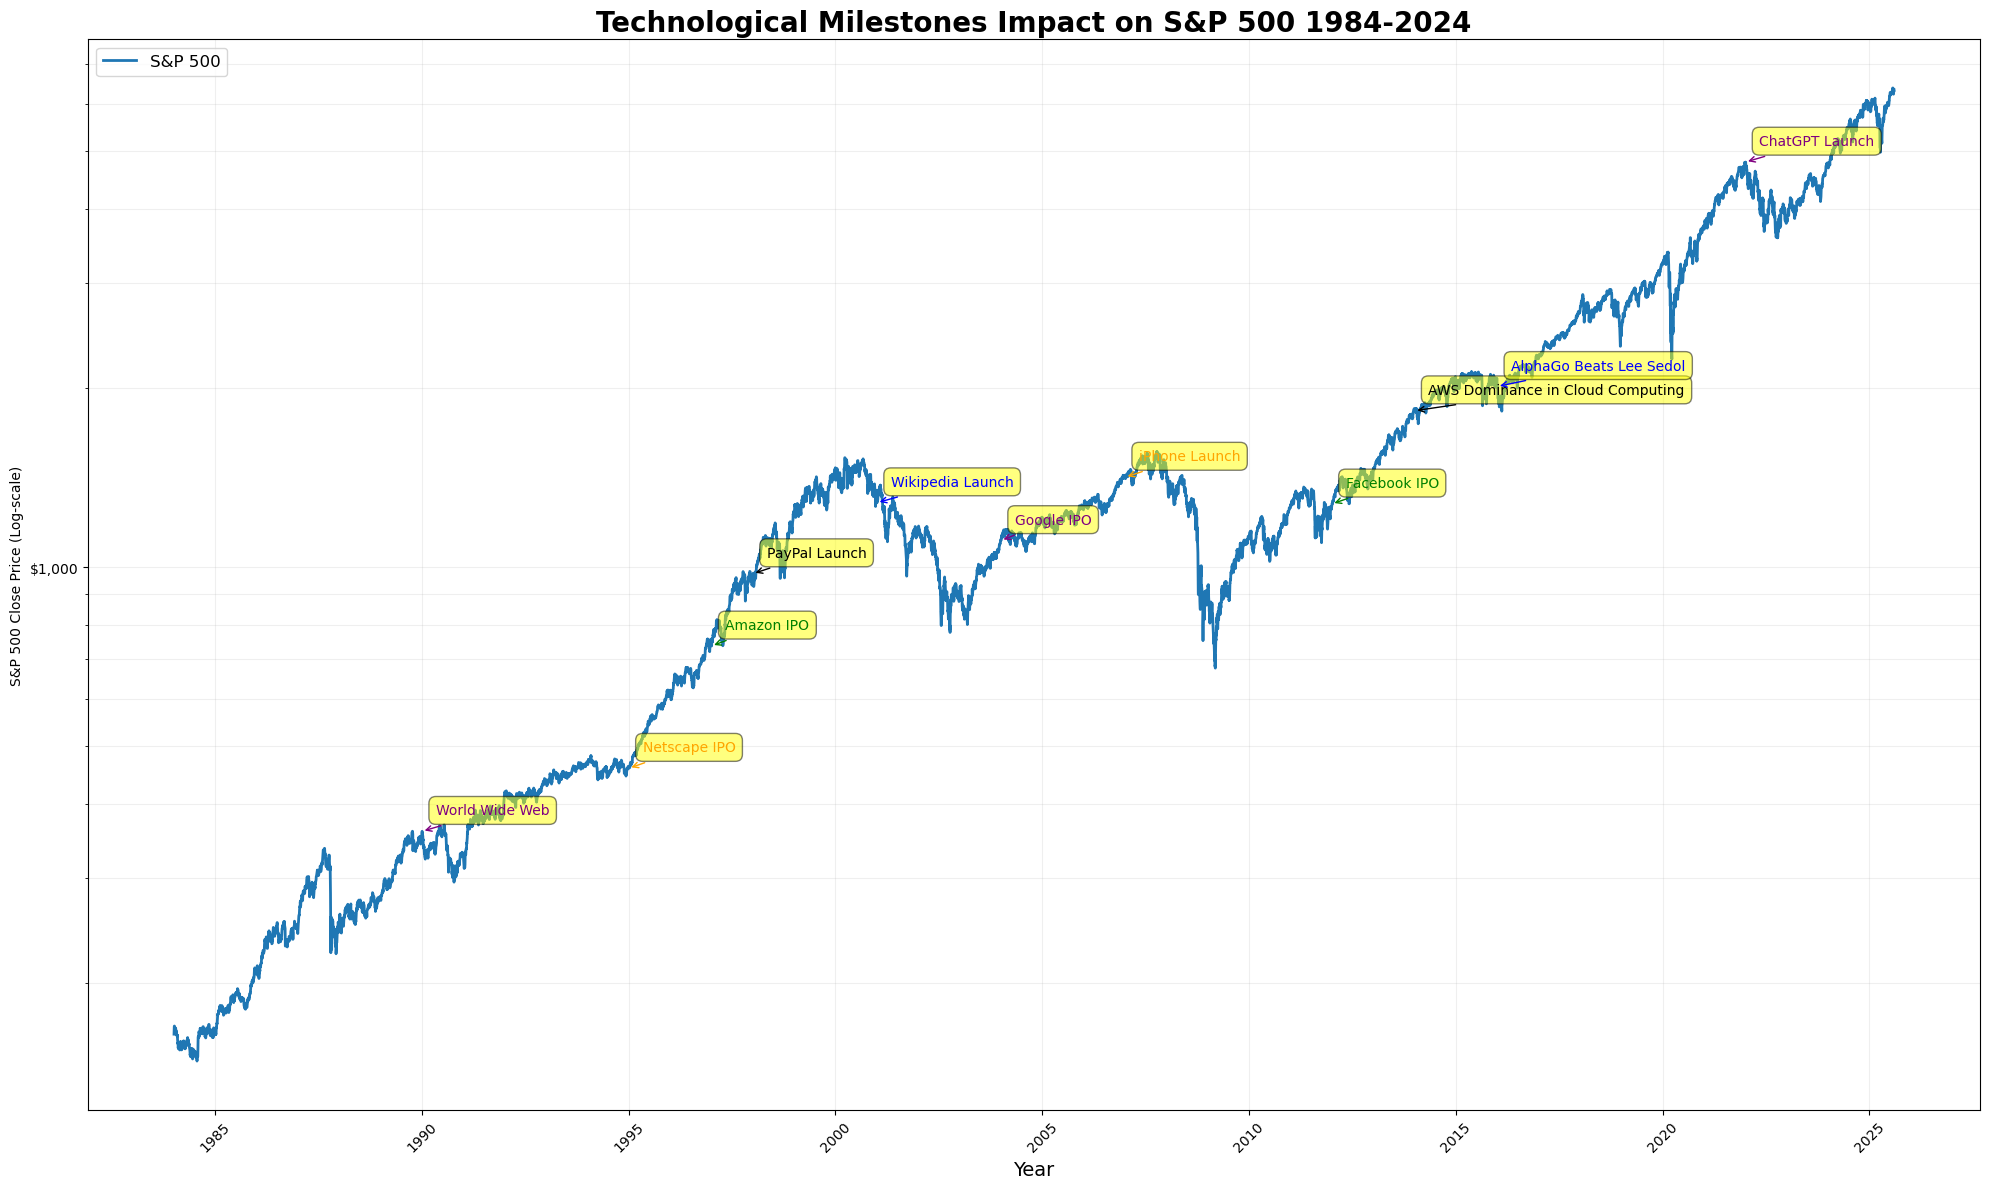

Starting Value: $164.04
Ending Value: $6345.06
Total Growth: $3768.00%


In [7]:
# Create the plot
plt.figure(figsize=(20,12))
ax = sns.lineplot(x=df_sp500.index, y=df_sp500['Close'], linewidth=2)

# Set y-axis to logarithmic scale to display growth more evenly across time period
ax.set_yscale('log')

# Name the plot
plt.title('Technological Milestones Impact on S&P 500 1984-2024', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('S&P 500 Close Price (Log-scale)')

# Defining major technological milestones
milestones = [(1981, 'IBM', 'blue'),
              (1990, 'World Wide Web', 'purple'),
              (1995, 'Netscape IPO', 'orange'),
              (1997, 'Amazon IPO', 'green'),
              (1998, 'PayPal Launch', 'black'),
              (2001, 'Wikipedia Launch', 'blue'),
              (2004, 'Google IPO', 'purple'),
              (2007, 'iPhone Launch', 'orange'),
              (2012, 'Facebook IPO', 'green'),
              (2014, 'AWS Dominance in Cloud Computing', 'black'),
              (2016, 'AlphaGo Beats Lee Sedol', 'blue'),
              (2022, 'ChatGPT Launch', 'purple')]

# Plotting technological milestones on S&P 500 Graph
for year, event, color in milestones:
    if year in df_sp500.index.year:
        price = df_sp500.loc[df_sp500.index.year == year, 'Close'].values[0]
        plt.annotate(event, (mdates.date2num(pd.Timestamp(f'{year}-01-01')), price), xytext=(10,10),
                     textcoords='offset points', ha='left', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5), 
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=color), 
                     fontsize=10, color=color)

# Customize x-axis to show ticks every 5 years
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Customizing y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adding gridlines
plt.grid(True, which="both", ls="-", alpha=0.2)

# Adding legend
plt.legend(['S&P 500'], loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

# Summarizing Statistics 
print(f"Starting Value: ${df_sp500['Close'].iloc[0]:.2f}")
print(f"Ending Value: ${df_sp500['Close'].iloc[-1]:.2f}")
print(f"Total Growth: ${(df_sp500['Close'].iloc[-1] / df_sp500['Close'].iloc[0] - 1) * 100:.2f}%")

Briefly, we can see that each major technological advancement has presaged an increase in the valuation of the S&P $500$. Wikipedia being an outlier, but in context, the launch of wikipedia was $2001$; right in the middle of the dot-com bubble bursting as well as $9/11$. It's difficult to decouple the impact of specific advancements with the greater context of the multifarious worldwide contributions to market conditions, but certainly we can see the overall trend is that major technological advancements have heralded greater returns.